In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import savefig
import pandas as pd

In [2]:
hobbygames_data = pd.read_csv("csv/hobbygames.csv", encoding="utf-8", encoding_errors='ignore', on_bad_lines='skip')
gagagames_data = pd.read_csv("csv/gagagames.csv", encoding="utf-8", encoding_errors='ignore', on_bad_lines='skip')
lavkaigr_data = pd.read_csv("csv/lavkaigr.csv", encoding="utf-8", encoding_errors='ignore', on_bad_lines='skip')

In [3]:
df_hobby = pd.DataFrame(hobbygames_data)
df_gaga = pd.DataFrame(gagagames_data)
df_lavka = pd.DataFrame(lavkaigr_data)

In [4]:
merged_hg_gaga = pd.DataFrame(pd.merge(df_hobby, df_gaga, on="Transliterated_name"))[
    pd.notnull(pd.DataFrame(pd.merge(df_hobby, df_gaga, on="Transliterated_name"))['Transliterated_name'])]
merge_data = pd.DataFrame(pd.merge(merged_hg_gaga, df_lavka, on="Transliterated_name"))[
    pd.notnull(pd.DataFrame(pd.merge(merged_hg_gaga, df_lavka, on="Transliterated_name"))['Transliterated_name'])]

In [5]:
colors = ['#8A2BE2', '#00FFFF', '#0000FF', '#00FF00', '#7FFFD4',
          '#D7F60A', '#FF0000', '#DC8C14', '#1E810E', '#009A71', '#FFE4E1', '#D07EBD', '#7E9181', '#F6BE8A', '#ACE99F',
          '#696969', '#000000']

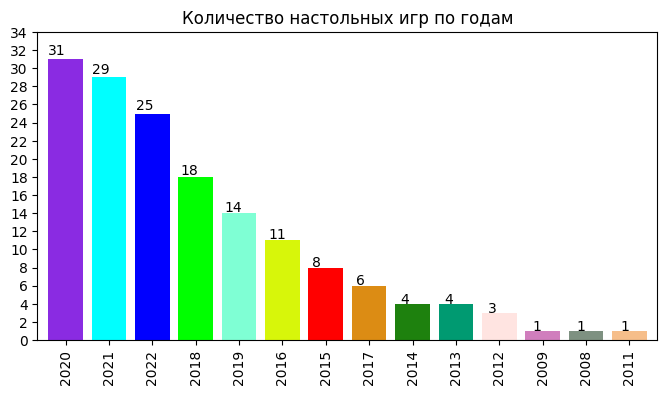

In [6]:
ax=merge_data['Year'].value_counts().plot(kind='bar',figsize=(8,4),title="Количество настольных игр по годам", width=0.8,color=colors)
max_value=merge_data['Year'].value_counts().max()
plt.yticks(ticks= [i for i in range(0,max_value+4,2)])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015))
savefig('images/year.png')

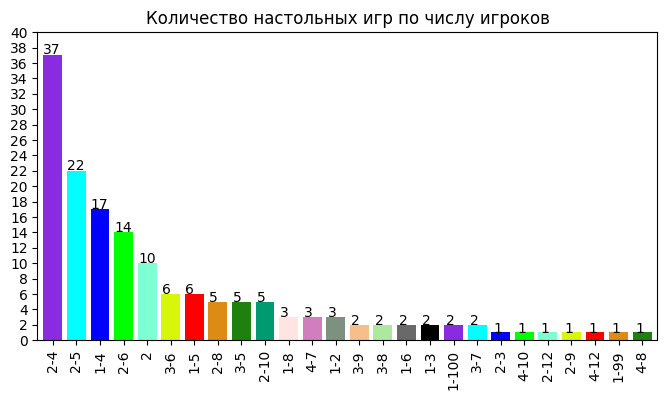

In [7]:
ax=merge_data['Player'].value_counts().plot(kind='bar', figsize=(8, 4), title="Количество настольных игр по числу игроков",
                                         width=0.8, color=colors)
max_value=merge_data['Player'].value_counts().max()
plt.yticks(ticks= [i for i in range(0,max_value+4,2)])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
savefig('images/player.png')

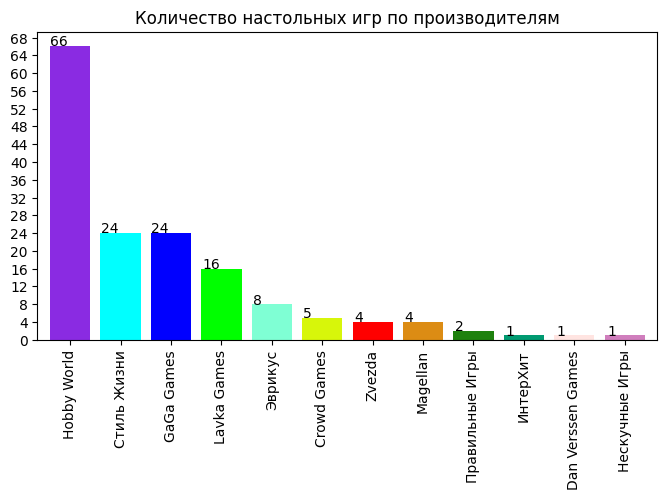

In [8]:
ax=merge_data['Manufacture'].value_counts().plot(kind='bar', figsize=(8, 4), title="Количество настольных игр по производителям",
                                         width=0.8, color=colors)
max_value=merge_data['Manufacture'].value_counts().max()
plt.yticks(ticks= [i for i in range(0,max_value+4,4)])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
savefig('images/manufacture.png')

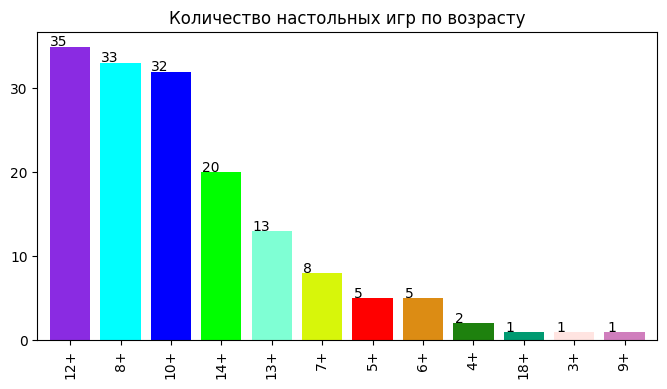

In [9]:
ax=merge_data['Age'].value_counts().plot(kind='bar', figsize=(8, 4), title="Количество настольных игр по возрасту",
                                         width=0.8, color=colors)
max_value=merge_data['Age'].value_counts().max()
plt.yticks(ticks= [i for i in range(0,max_value+4,10)])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
savefig('images/age.png')

In [10]:
merge_data = merge_data.sort_values(by=['Name_HG'])
buttons_data = pd.DataFrame()
library_buttons = pd.DataFrame(merge_data['Name_HG'].astype(str).str[0].drop_duplicates())
year_buttons = pd.DataFrame(merge_data['Year'].sort_values(ascending=False).drop_duplicates())
manufacture_buttons = pd.DataFrame(merge_data['Manufacture'].sort_values(ascending=False).drop_duplicates().sort_values())
age_buttons = pd.DataFrame(merge_data['Age'].sort_values(ascending=False).drop_duplicates())
player_buttons = pd.DataFrame(merge_data['Player'].sort_values(ascending=False).drop_duplicates())

library_buttons = library_buttons.reset_index(drop=True)
year_buttons = year_buttons.reset_index(drop=True)
manufacture_buttons = manufacture_buttons.reset_index(drop=True)
age_buttons = age_buttons.reset_index(drop=True)
player_buttons = player_buttons.reset_index(drop=True)

library_buttons = library_buttons.transpose()
year_buttons = year_buttons.transpose()
manufacture_buttons = manufacture_buttons.transpose()
age_buttons = age_buttons.transpose()
player_buttons = player_buttons.transpose()


buttons_data = buttons_data.append(library_buttons)
buttons_data = buttons_data.append(year_buttons)
buttons_data = buttons_data.append(manufacture_buttons)
buttons_data = buttons_data.append(age_buttons)
buttons_data = buttons_data.append(player_buttons)

buttons_data = buttons_data.transpose()

buttons_data

C:\Users\ilyan\AppData\Local\Temp\ipykernel_16448\1532939027.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.append(library_buttons)
C:\Users\ilyan\AppData\Local\Temp\ipykernel_16448\1532939027.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.append(year_buttons)
C:\Users\ilyan\AppData\Local\Temp\ipykernel_16448\1532939027.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.append(manufacture_buttons)
C:\Users\ilyan\AppData\Local\Temp\ipykernel_16448\1532939027.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  buttons_data = buttons_data.app

,Name_HG,Year,Manufacture,Age,Player
0,C,2022,Crowd Games,9+,4-8
1,F,2021,Dan Verssen Games,8+,4-7
2,L,2020,GaGa Games,7+,4-12
3,R,2019,Hobby World,6+,4-10
4,S,2018,Lavka Games,5+,3-9
5,Ё,2017,Magellan,4+,3-8
6,А,2016,Zvezda,3+,3-7
7,Б,2015,ИнтерХит,18+,3-6
8,В,2014,Нескучные Игры,14+,3-5
9,Г,2013,Правильные Игры,13+,2-9


In [11]:
buttons_data.to_csv("buttons.csv", index=False)

In [12]:
merge_data = merge_data.drop(columns=['Transliterated_name', 'Name_ga', 'Name_LI'])
merge_data.to_csv("merged_data_parsers.csv", index=False)

C:\Users\ilyan\PycharmProjects\sravni_beri\venv\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
